In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization,Input,Embedding,Dense,Dot, Reshape
from tensorflow.keras import Model
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

c:\Users\Ashwin\miniconda3\envs\tf_gpu\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.7.0 and strictly below 2.10.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [5]:
def custom_standardization(input_data):
    return stripped_tags

In [6]:
tag_data=pd.read_csv("../data/genome-tags.csv")

VOCAB_SIZE=tag_data.tagId.nunique()+2

VOCAB_SIZE

1130

In [7]:
tag_data

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s
...,...,...
1123,1124,writing
1124,1125,wuxia
1125,1126,wwii
1126,1127,zombie


In [8]:
VOCABULARY=tag_data.tag.unique().tolist()
len(VOCABULARY)

1128

In [9]:
SEQUENCE_LENGTH=50

In [10]:
master_data=pd.read_csv("../data/Master_dataset.csv")

In [11]:
NUMBER_OF_MOVIES=master_data.movieId.nunique()
NUMBER_OF_USERS=master_data.userId.nunique()

In [12]:
import os
os.environ["TFHUB_MODEL_LOAD_FORMAT"]="UNCOMPRESSED"

In [16]:
bert=hub.KerasLayer(hub.load("../models/bert_en_uncased_model/"))
bert_preprocessing=hub.KerasLayer(hub.load("../models/bert_en_uncased_preprocess"))
text_test = ['this is such an amazing movie!']
text_preprocessed = bert_preprocessing(text_test)

In [25]:
bert(text_preprocessed)

{'pooled_output': <tf.Tensor: shape=(1, 768), dtype=float32, numpy=
 array([[-0.9216864 , -0.39364985, -0.5401813 ,  0.68267155,  0.4390489 ,
         -0.1402008 ,  0.87749565,  0.2605826 , -0.6316952 , -0.9999659 ,
         -0.263578  ,  0.85122913,  0.98570925,  0.18641602,  0.96457815,
         -0.60037684, -0.2161695 , -0.60723436,  0.33560044, -0.5507246 ,
          0.7183043 ,  0.99972135,  0.399579  ,  0.2708195 ,  0.48029974,
          0.9555295 , -0.77164483,  0.9614904 ,  0.95828795,  0.72736114,
         -0.7411457 ,  0.11925898, -0.9911773 , -0.22011821, -0.68260324,
         -0.99011135,  0.36183155, -0.7947883 ,  0.07121448,  0.0930822 ,
         -0.9396649 ,  0.1408429 ,  0.99987   , -0.349242  ,  0.13441902,
         -0.33571568, -0.99999964,  0.18737721, -0.87942606,  0.6794094 ,
          0.5336223 ,  0.41188294,  0.16478644,  0.46623108,  0.3736972 ,
         -0.05967636, -0.17970116,  0.02793555, -0.18826607, -0.5940139 ,
         -0.61240923,  0.27810332, -0.751990

In [17]:
text_preprocessed

{'input_word_ids': <tf.Tensor: shape=(1, 128), dtype=int32, numpy=
 array([[ 101, 2023, 2003, 2107, 2019, 6429, 3185,  999,  102,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0]])>,
 'input_type_ids': <tf.Tensor: shape=(1, 128), dtype=

In [35]:
from tensorflow.keras import Sequential, layers

In [19]:
bert.trainable

False

In [38]:
def create_model(embedding_size=16):
    user_tag=Input(name="user_tags",shape=(),dtype=tf.string)
    movie_tag=Input(name="movie_tags",shape=(),dtype=tf.string)
    user_features=bert_preprocessing(user_tag)
    movie_features=bert_preprocessing(movie_tag)
    
    user_features=bert(user_features)["pooled_output"]
    movie_features=bert(movie_features)["pooled_output"]
    
    # movie_tag_vectorized = TextVectorization(
    # standardize="strip_punctuation",
    # max_tokens=VOCAB_SIZE,
    # output_mode='int',
    # output_sequence_length=SEQUENCE_LENGTH,
    # vocabulary=VOCABULARY)(movie_tag)
    
    # user_embedding= Embedding(name = 'user_embedding',input_dim = NUMBER_OF_USERS, output_dim = embedding_size)(user_tag_vectorized)
    # movie_embedding= Embedding(name = 'movie_embedding',input_dim = NUMBER_OF_MOVIES, output_dim = embedding_size)(movie_tag_vectorized)
    
    # merged = Dot(name = 'dot_product', normalize = True, axes = -1)([user_features, movie_features])
    
    merged = layers.Concatenate(axis=-1)([user_features,movie_features])
    
    # merged = Reshape(target_shape = [2500])(merged)
    
    merged=Dense(25, activation="elu")(merged)
    
    # merged=Dense(1500, activation="elu")(merged)
    
    # merged=Dense(500, activation="elu")(merged)
    
    out = Dense(6, activation="softmax")(merged)
    
    model = Model(inputs = [user_tag, movie_tag], outputs = out)
    
    optimizer = tf.keras.optimizers.Adam(clipvalue=1.0)
    
    model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    return model

In [39]:
model=create_model()

In [40]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user_tags (InputLayer)         [(None,)]            0           []                               
                                                                                                  
 movie_tags (InputLayer)        [(None,)]            0           []                               
                                                                                                  
 keras_layer_2 (KerasLayer)     {'input_word_ids':   0           ['user_tags[0][0]',              
                                (None, 128),                      'movie_tags[0][0]']             
                                 'input_type_ids':                                                
                                (None, 128),                                                  

In [41]:
def split_x_and_y(data,label="rating"):
    X_user=data["user_tags"]
    X_movie=data["tag"]
    y=data[label]
    return X_user,X_movie, y

In [42]:
test=pd.read_csv("../input/train_user_item.csv")
train=pd.read_csv("../input/test_user_item.csv")
validation=pd.read_csv("../input/validation_user_item.csv")

In [43]:
value_counts=train["rating"].value_counts().to_dict()

In [16]:
value_counts

{4: 107772, 5: 102182, 3: 44429, 6: 32066, 2: 16878, 1: 6265}

In [44]:
highest_frequency=max(value_counts.values())

In [45]:
class_weights={k:(highest_frequency/v) for k,v in value_counts.items()}

In [46]:
class_weights

{4: 1.0,
 5: 1.0547063083517645,
 3: 2.4257129352449978,
 6: 3.3609430549491672,
 2: 6.38535371489513,
 1: 17.20223463687151}

In [47]:
train_user, train_movie, train_y=split_x_and_y(train)
test_user, test_movie, test_y=split_x_and_y(test)

validation_user, validation_movie, validation_y=split_x_and_y(validation)

In [48]:
train

,user_tags,tag,rating
0,nudity full frontal notable disturbing origin...,romance boring boring death original predictab...,2
1,offbeat comedy super hero special effects girl...,science fiction trilogy epic star wars redempt...,4
2,goth nudity topless notable original bloody v...,chase fantasy world special effects comedy ori...,4
3,chase super hero special effects comedy parody...,big budget oscar best cinematography costume d...,4
4,girlie movie mafia pornography internet prohib...,big budget intense plot holes natural disaster...,4
...,...,...,...
309587,death original based on a book suspense cathol...,mythology aliens scifi science fiction alien s...,4
309588,military politics original fighting the system...,books fantasy world parallel universe dark fan...,5
309589,satirical comedy original dark humor dark come...,nudity full frontal notable weird relationshi...,5
309590,death insanity dreamlike absurd cinematography...,oscar best cinematography oscar best picture b...,5


In [49]:
train.isna().sum()

user_tags    0
tag          0
rating       0
dtype: int64

In [50]:
train_user

0         nudity full frontal  notable disturbing origin...
1         offbeat comedy super hero special effects girl...
2         goth nudity topless  notable original bloody v...
3         chase super hero special effects comedy parody...
4         girlie movie mafia pornography internet prohib...
                                ...                        
309587    death original based on a book suspense cathol...
309588    military politics original fighting the system...
309589    satirical comedy original dark humor dark come...
309590    death insanity dreamlike absurd cinematography...
309591    super hero special effects disability fight sc...
Name: user_tags, Length: 309592, dtype: object

In [53]:
history=model.fit(
    x=[train_user,train_movie],
    y=train_y,
    batch_size=1,
    validation_data=([validation_user,validation_movie],validation_y),
    # class_weights=class_weights
    epochs=20)

Epoch 1/20
   880/309592 [..............................] - ETA: 3:57:38 - loss: nan - accuracy: 0.0000e+00

KeyboardInterrupt: 

In [ ]:
model.weights

[<tf.Variable 'user_embedding/embeddings:0' shape=(1551, 16) dtype=float32, numpy=
 array([[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [ 0.04512953,  0.01115441,  0.01165453, ..., -0.00949913,
          0.01853282, -0.02035589],
        ...,
        [-0.02844502,  0.02624593, -0.04054041, ..., -0.04916764,
          0.0405376 ,  0.02761454],
        [-0.01155233, -0.03861005,  0.00013634, ..., -0.04828851,
          0.01716608, -0.03707621],
        [-0.03440816, -0.02111095, -0.02314947, ..., -0.0218546 ,
          0.02157481,  0.02062521]], dtype=float32)>,
 <tf.Variable 'movie_embedding/embeddings:0' shape=(13816, 16) dtype=float32, numpy=
 array([[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,

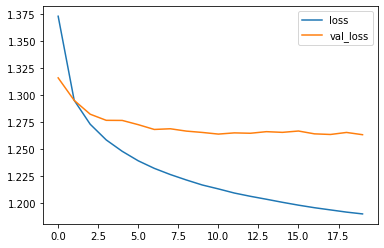

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["loss","val_loss"])

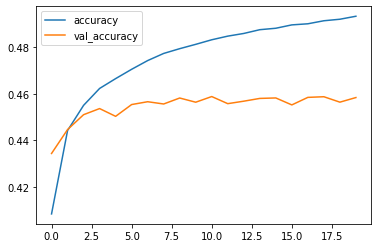

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["accuracy","val_accuracy"])

In [ ]:
model.evaluate(
    x=[test_user,test_movie],
    y=test_y,
    batch_size=1024,
    )

394/394 [==============================] - 58s 145ms/step - loss: 1.2189 - accuracy: 0.4793


[1.2189396619796753, 0.4792655408382416]

In [ ]:
y_pred=np.argmax(model.predict([test_user, test_movie]),axis=1)

12578/12578 [==============================] - 98s 8ms/step


In [ ]:
train_y.value_counts()

3    107640
4    102245
2     44437
5     31995
1     17039
0      6236
Name: rating, dtype: int64

In [ ]:
test_y.value_counts()

3    140123
4    133103
2     57298
5     41751
1     22060
0      8135
Name: rating, dtype: int64

In [ ]:
y_pred

array([4, 3, 3, ..., 4, 4, 4], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
test_y

0         4
1         4
2         1
3         4
4         3
         ..
402465    3
402466    1
402467    3
402468    2
402469    3
Name: rating, Length: 402470, dtype: int64

In [ ]:
print(classification_report(y_pred=y_pred,y_true=test_y))

              precision    recall  f1-score   support

           0       0.52      0.35      0.42      8135
           1       0.41      0.20      0.27     22060
           2       0.42      0.23      0.30     57298
           3       0.48      0.58      0.53    140123
           4       0.49      0.61      0.55    133103
           5       0.49      0.23      0.31     41751

    accuracy                           0.48    402470
   macro avg       0.47      0.37      0.39    402470
weighted avg       0.47      0.48      0.46    402470

